Chapter 15

# 两个服从高斯分布随机变量相加
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码生成了两个相关的正态分布随机变量 $X_1$ 和 $X_2$ 并展示它们的分布特性，以及它们之和 $Y = X_1 + X_2$ 的分布随相关系数 $\rho$ 变化的情况。具体过程如下：

1. **初始化参数**：
   - $X_1$ 和 $X_2$ 分别具有均值 $\mu_{X_1} = -5$ 和 $\mu_{X_2} = 5$，标准差 $\sigma_{X_1} = 3$ 和 $\sigma_{X_2} = 4$。初始相关系数 $\rho = 0.8$。

2. **协方差矩阵**：
   - 定义随机变量的均值向量 $$\mu = [\mu_{X_1}, \mu_{X_2}]$$ 和协方差矩阵：
     $$
     \Sigma = \begin{bmatrix} \sigma_{X_1}^2 & \sigma_{X_1}\sigma_{X_2}\rho \\ \sigma_{X_1}\sigma_{X_2}\rho & \sigma_{X_2}^2 \end{bmatrix}
     $$

3. **生成多变量正态分布数据**：
   - 通过 `np.random.multivariate_normal` 函数生成 5000 组样本值，每组包含 $X_1$ 和 $X_2$，并绘制 $X_1$ 和 $X_2$ 的分布直方图。
   - 添加 $X_1$ 和 $X_2$ 的均值 $\mu_{X_1}$ 和 $\mu_{X_2}$ 以及它们的一倍标准差范围 $\mu \pm \sigma$ 的垂直线，以便观察均值与分布的对应关系。

4. **计算 $Y = X_1 + X_2$ 的分布**：
   - 针对不同的相关系数 $\rho$ 值（从 -0.8 到 0.8），逐步计算 $Y = X_1 + X_2$。
   - 对每一组 $\rho$，分别绘制 $X_1$、$X_2$ 和 $Y$ 的直方图，$Y$ 的直方图使用叠加色彩以便区分。
   - 使用红色垂直线表示 $Y$ 的均值和标准差 $\mu_Y \pm \sigma_Y$。当 $\rho$ 改变时，$Y$ 的分布形状也会随之变化：高正相关性会使得 $Y$ 的分布更为集中，而负相关性会使得 $Y$ 的分布更分散。


In [1]:
import numpy as np  # 导入数值计算库numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib

## 设置X1和X2的均值与标准差

In [2]:
mu_X1, sigma_X1 = -5, 3  # X1的均值和标准差
mu_X2, sigma_X2 = 5, 4  # X2的均值和标准差

## 设置相关系数

In [3]:
rho = 0.8  # 相关系数

## 设置均值向量和协方差矩阵

In [4]:
MU = [mu_X1, mu_X2]  # 均值向量
SIGMA = [[sigma_X1**2, sigma_X1 * sigma_X2 * rho], 
         [sigma_X1 * sigma_X2 * rho, sigma_X2**2]]  # 协方差矩阵

## 生成二维正态分布数据

In [5]:
X_12 = np.random.multivariate_normal(MU, SIGMA, 5000)  # 生成5000个样本
X1 = X_12[:, 0]  # 提取X1数据
X2 = X_12[:, 1]  # 提取X2数据

## 绘制X1和X2的直方图

(0.0, 0.2)

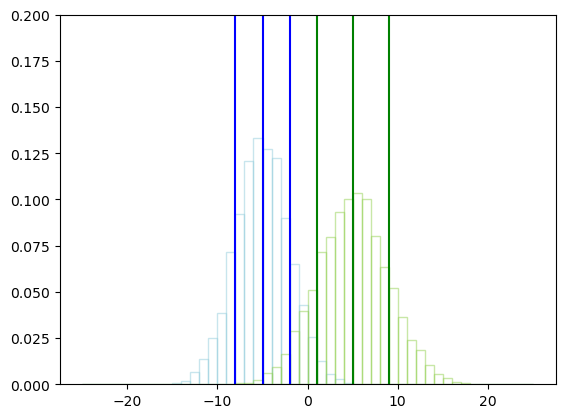

In [6]:
fig, ax = plt.subplots()  # 创建绘图窗口

plt.hist(X1, bins=50, range=[-25, 25], 
         density=True, facecolor="None", edgecolor='#92CDDC', alpha=0.5)  # 绘制X1的直方图

plt.axvline(x=mu_X1, color='b')  # 绘制X1均值的垂直线
plt.axvline(x=mu_X1 - sigma_X1, color='b')  # 绘制X1均值减一倍标准差的垂直线
plt.axvline(x=mu_X1 + sigma_X1, color='b')  # 绘制X1均值加一倍标准差的垂直线

plt.hist(X2, bins=50, range=[-25, 25], 
         density=True, facecolor="None", edgecolor='#92D050', alpha=0.5)  # 绘制X2的直方图

plt.axvline(x=mu_X2, color='g')  # 绘制X2均值的垂直线
plt.axvline(x=mu_X2 - sigma_X2, color='g')  # 绘制X2均值减一倍标准差的垂直线
plt.axvline(x=mu_X2 + sigma_X2, color='g')  # 绘制X2均值加一倍标准差的垂直线

plt.ylim(0, 0.2)  # 设置y轴范围

## 可视化Y = X1 + X2分布

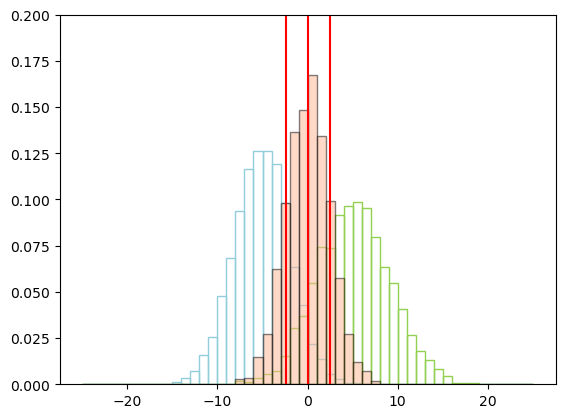

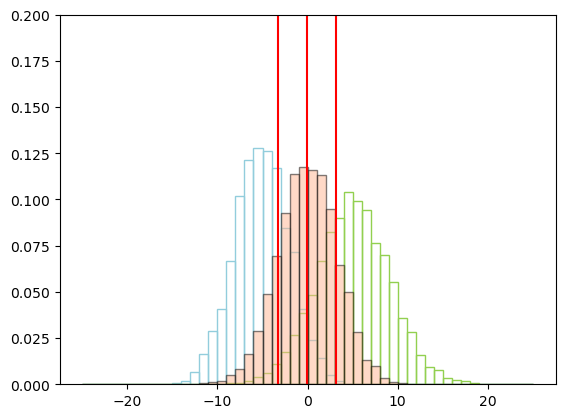

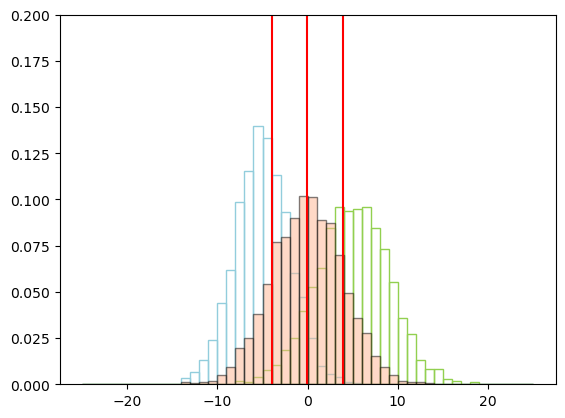

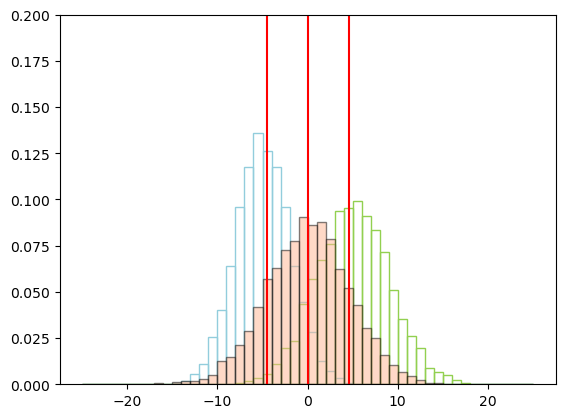

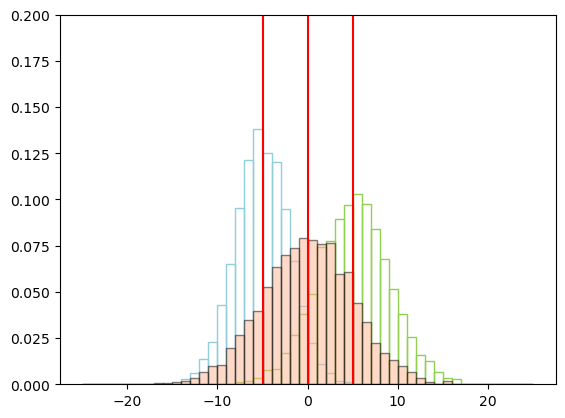

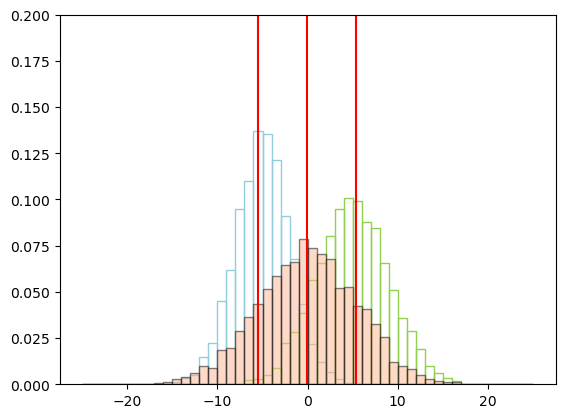

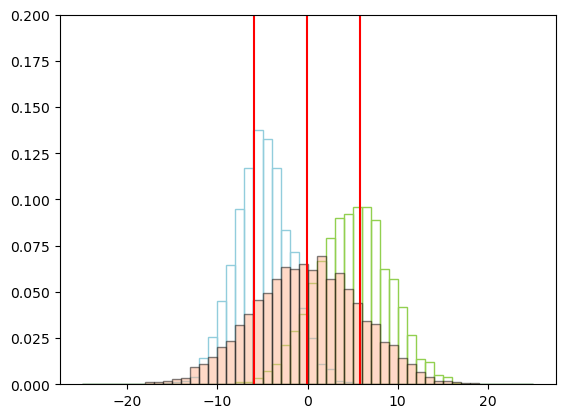

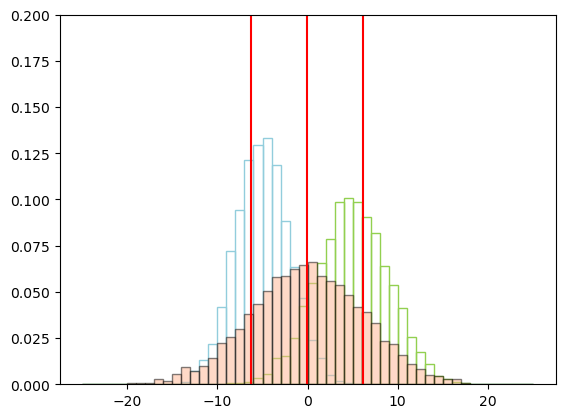

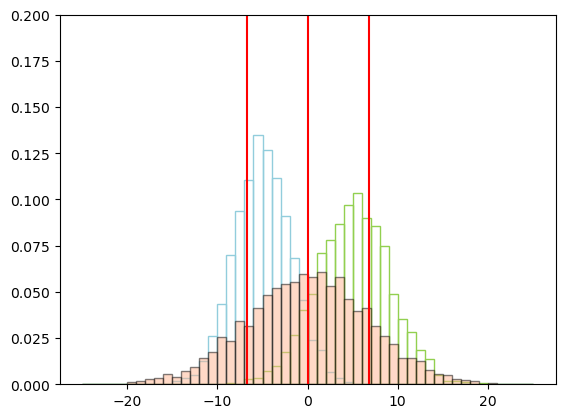

In [7]:
for rho in [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8]:  # 遍历不同相关系数

    MU = [mu_X1, mu_X2]  # 均值向量
    SIGMA = [[sigma_X1**2, sigma_X1 * sigma_X2 * rho], 
             [sigma_X1 * sigma_X2 * rho, sigma_X2**2]]  # 协方差矩阵

    X_12 = np.random.multivariate_normal(MU, SIGMA, 5000)  # 生成5000个样本
    X1 = X_12[:, 0]  # 提取X1数据
    X2 = X_12[:, 1]  # 提取X2数据
    
    Y = X1 + X2  # 计算Y = X1 + X2

    fig, ax = plt.subplots()  # 创建绘图窗口

    plt.hist(X1, bins=50, range=[-25, 25], 
             density=True, facecolor="None", edgecolor='#92CDDC')  # 绘制X1的直方图
    
    plt.hist(X2, bins=50, range=[-25, 25], 
             density=True, facecolor="None", edgecolor='#92D050')  # 绘制X2的直方图

    plt.hist(Y, bins=50, range=[-25, 25], 
             density=True, color='#FFB591', edgecolor='k', alpha=0.5)  # 绘制Y的直方图

    plt.axvline(x=Y.mean(), color='r')  # 绘制Y均值的垂直线
    plt.axvline(x=Y.mean() - Y.std(), color='r')  # 绘制Y均值减一倍标准差的垂直线
    plt.axvline(x=Y.mean() + Y.std(), color='r')  # 绘制Y均值加一倍标准差的垂直线
    plt.ylim(0, 0.2)  # 设置y轴范围